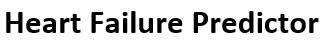

##Dataset Analysis

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import plotly.express as px

In [235]:
db = 'https://raw.githubusercontent.com/DRK-02/Heart-Failure-Predictor/main/Data_Set.csv?token=GHSAT0AAAAAABXLXMDVTLVUJ5XN4H2YDKTGYXSIUCQ'
df = pd.read_csv(db)

In [236]:
display(df)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [237]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartFailure'],
      dtype='object')

In [238]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartFailure
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartFailure    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [240]:
px.bar(df, x = 'Age', y = 'HeartFailure', title = 'Heart Failures acroos All Ages', 
       labels = {'Age': 'Age', 'HeartFailure': 'Heart Failures'})

In [241]:
px.pie(df, values = 'HeartFailure', names = 'Sex', 
       title = 'Heart Failures across both Genders')

In [242]:
px.pie(df, values = 'HeartFailure', names = 'ChestPainType', 
       title = 'Heart Failures across both Genders')

In [243]:
px.violin(df, x = 'HeartFailure', y = 'RestingBP', color = 'HeartFailure', points = 'all',
          labels = {'HeartFailure': 'Heart Failure', 'RestingBP': 'Resting Blood Pressure'}, 
          title = 'Variations of BP during Heart Failure', height = 1000,box=True)

In [244]:
px.violin(df, x = 'HeartFailure', y = 'Cholesterol', color = 'HeartFailure', points = 'all',
          labels = {'HeartFailure': 'Heart Failure', 'Cholesterol': 'Cholesterol'}, 
          title = 'Variations of Cholestrol Levels during Heart Failures', height = 1000,box=True)

In [245]:
px.pie(df, values = 'HeartFailure', names = 'FastingBS', 
       title = 'Fasting blood sugar[1:FastingBS > 120 mg/dl, 0: otherwise]')

In [246]:
px.pie(df, values = 'HeartFailure', names = 'RestingECG', 
       title = 'ECG Characteristics during Heart failures')

In [247]:
px.scatter(df, x="MaxHR", y="HeartFailure", size = 'Age', color="MaxHR",
           hover_name="MaxHR", log_x=True, size_max=60,title="Maximum heart rate achieved [1:Heart failure, 0:Otherwise]")

In [248]:
px.pie(df, values = 'HeartFailure', names = 'ExerciseAngina', 
       title = 'Exercise-induced angina')

In [249]:
px.violin(df, x = 'HeartFailure', y = 'Oldpeak', color = 'HeartFailure', points = 'all',
          labels = {'HeartFailure': 'Heart Failure', 'Oldpeak':'Numeric value of ST measured in depression'}, 
          title = 'Variations of Oldpeak value during Heart Failures',height=900,box=True)

In [250]:
count = [0, 0, 0]

for slope, i in zip(df['ST_Slope'], df['HeartFailure']):
    if i == 1 and slope == 'Flat':
        count[0] += 1

    elif i == 1 and slope == 'Up':
        count[1] += 1

    elif i == 1 and slope == 'Down':
        count[2] += 1

st_slope = dict(Slopes=["Flat", 'Upsloping', 'Downsloping'], num = count)
px.funnel(st_slope, x = 'num', y = 'Slopes')

In [251]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

In [252]:
display(df)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [253]:
display(df[df['RestingBP'] == 0])

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
449,55,1,2,0,0,0,1,155,0,1.5,1,1


In [254]:
df = df[df['RestingBP'] != 0]

In [255]:
display(df)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartFailure
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


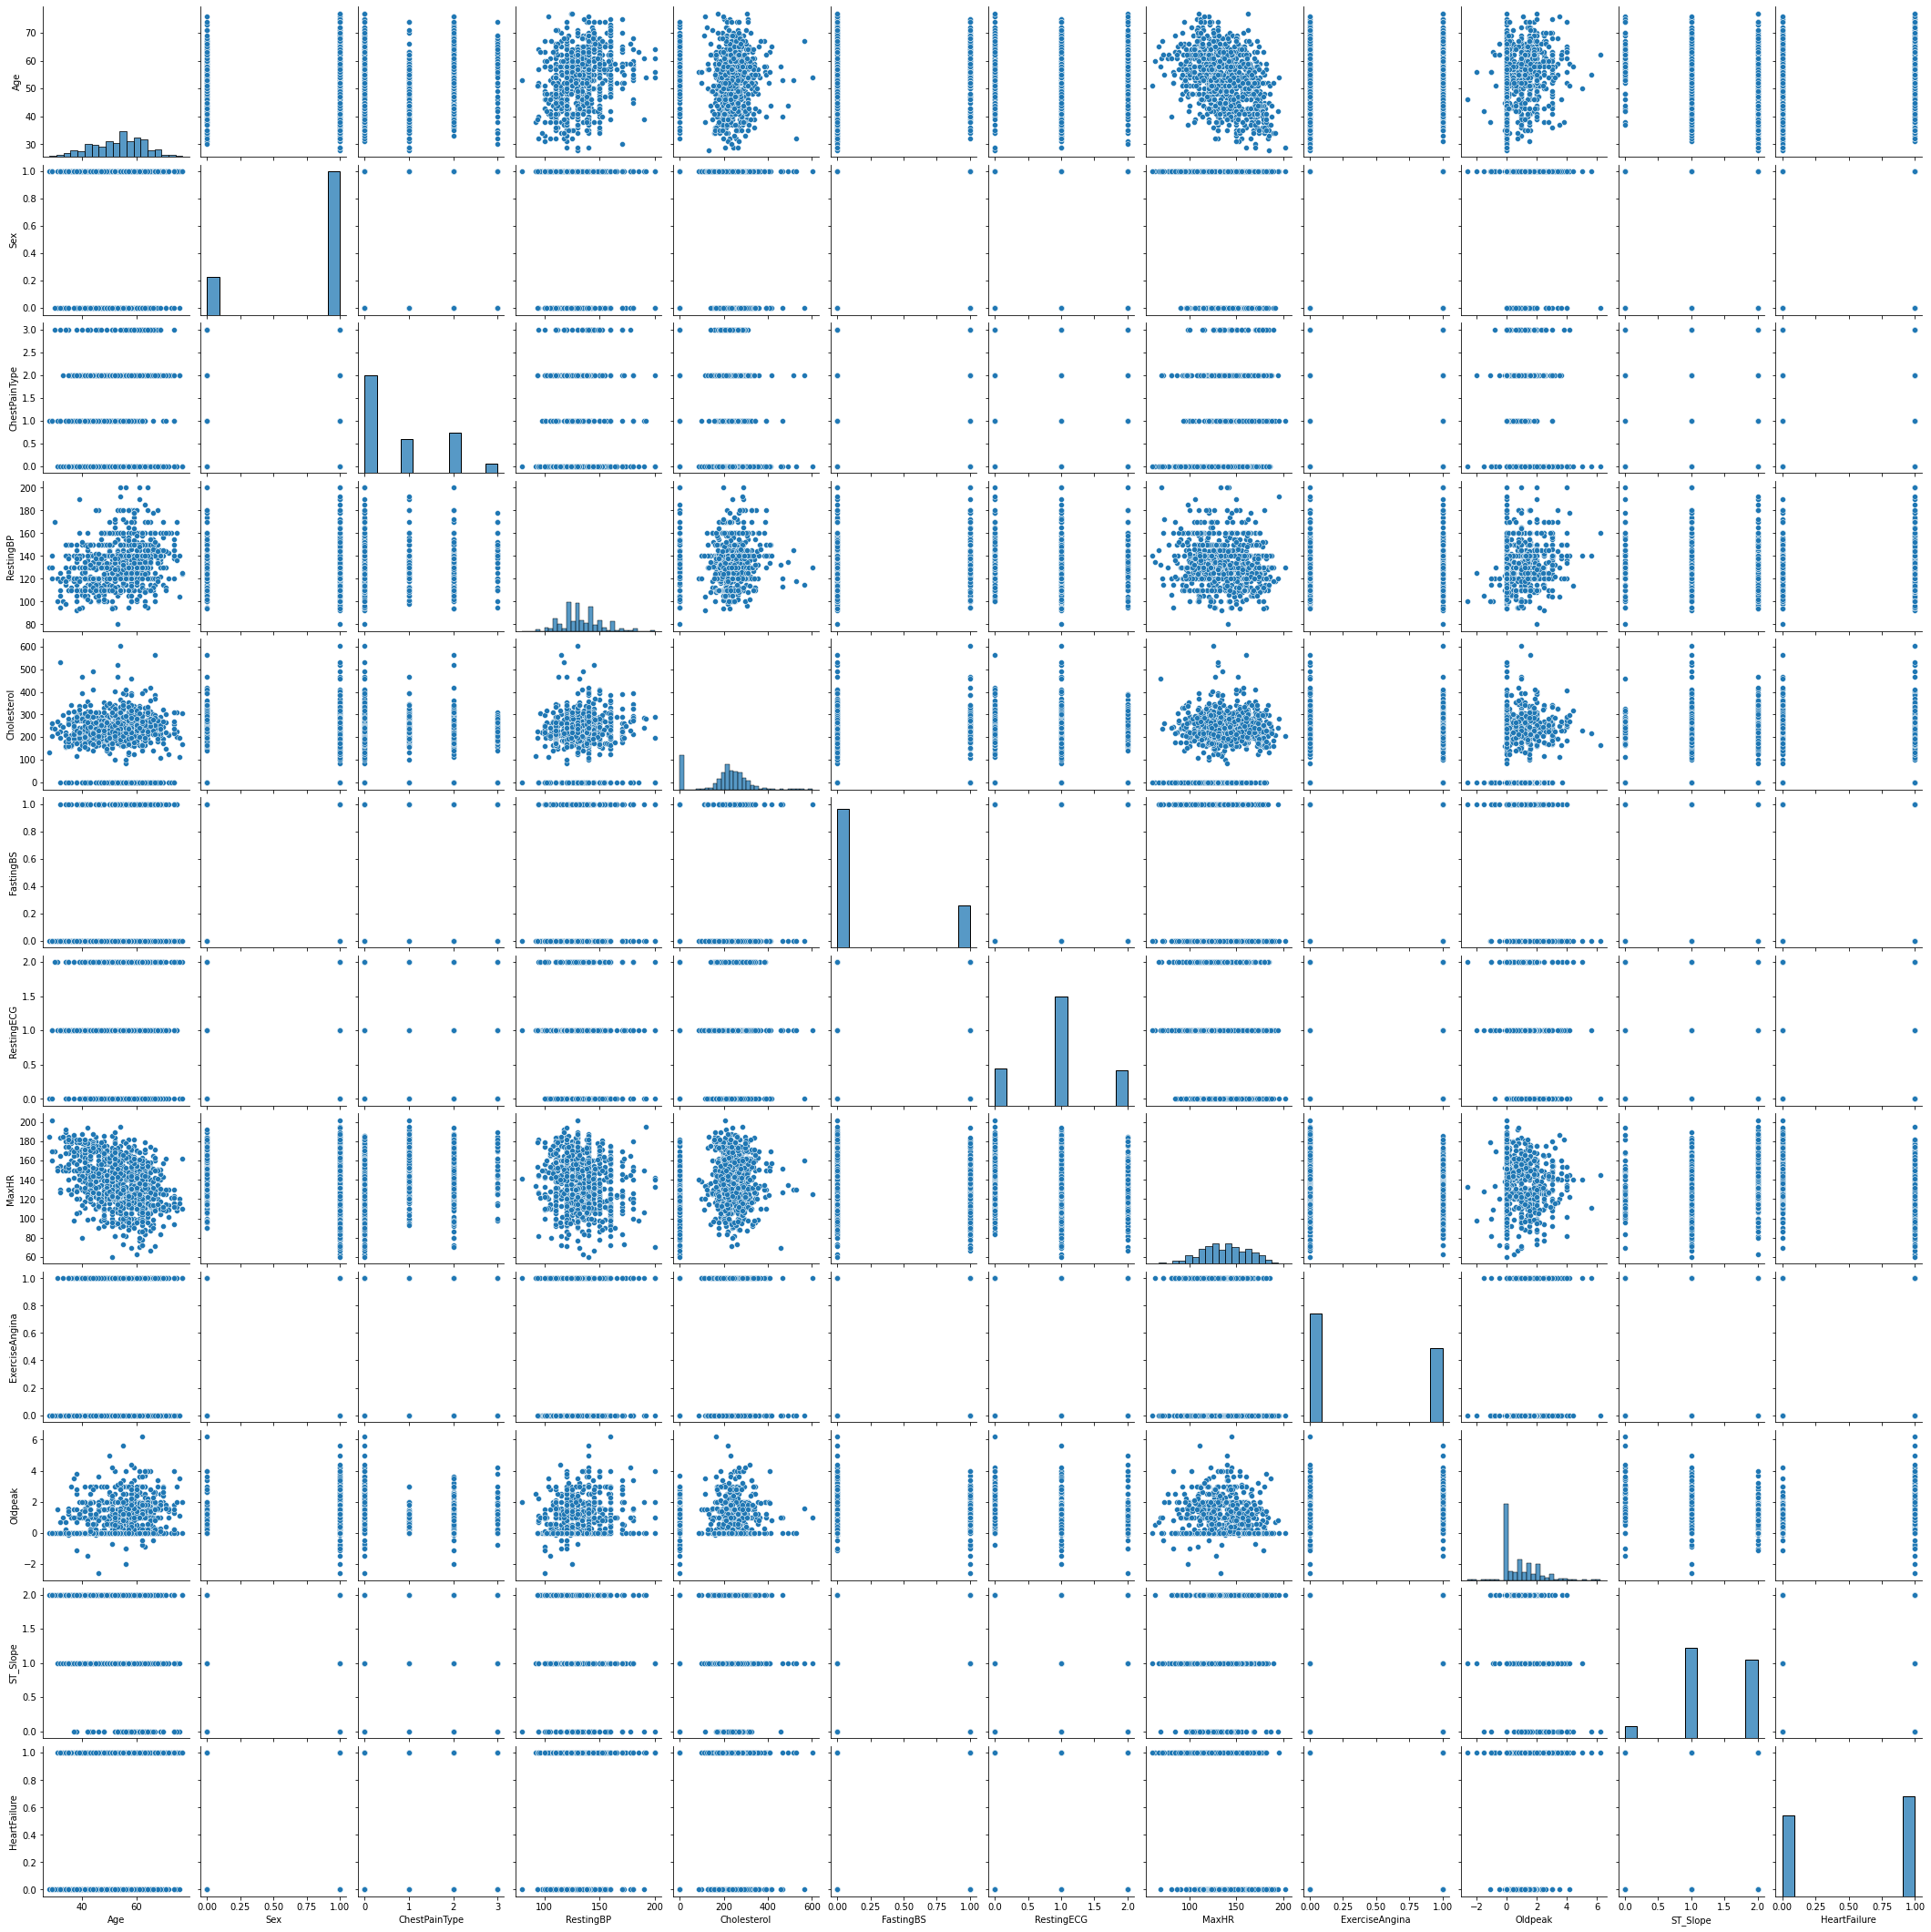

In [256]:
sns.pairplot(df)

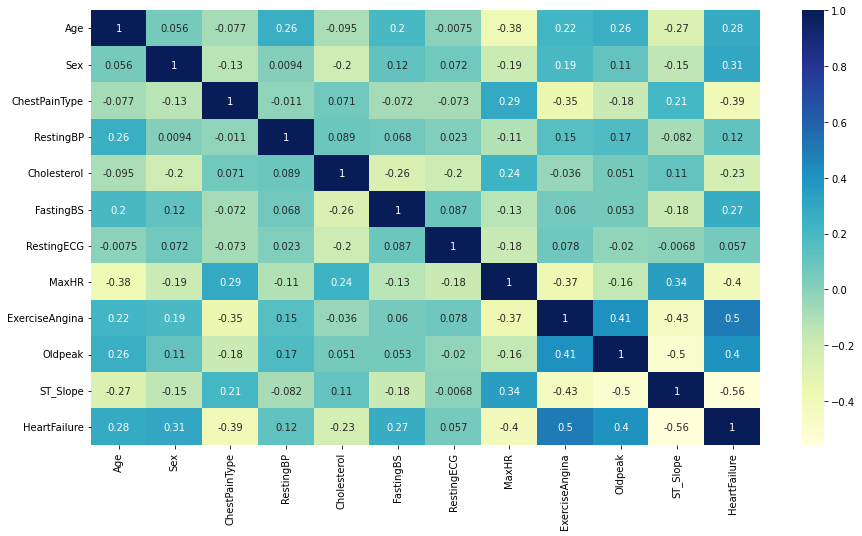

In [257]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)

## Predicting Heart Failures using Various Algorithms

In [258]:
from sklearn.metrics import*
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor

In [259]:
logistic=LogisticRegression()
decision=DecisionTreeClassifier()
randomforest=RandomForestClassifier(n_estimators=100, criterion = 'gini', random_state=1)
extratree=ExtraTreesClassifier()
knn=KNeighborsClassifier()
svm=SVC(probability=True)
gauss=GaussianNB()

In [260]:
models=[logistic,decision,randomforest,extratree,knn,svm,gauss]

In [261]:
xdf=df.drop("HeartFailure",axis=1)
ydf=df["HeartFailure"]
x_train,x_test,y_train,y_test=train_test_split(xdf,ydf,test_size=0.35,random_state=20)

In [262]:
mms=MinMaxScaler(feature_range=(0,1))
x_train=mms.fit_transform(x_train)
x_test=mms.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [263]:
for i in range(10):
    name=['Logistic Regression', 'Decision Tree', 'Random Forest', 'Extra Trees', 'KNN', 'SVM', 'Gaussian Naive Bayes']
    acc=[]
    mae=[]
    for algo in models:
        algo.fit(x_train,y_train)
        predictions=algo.predict(x_test)
        TP, FN, FP, TN = confusion_matrix(y_test,predictions,labels=[1,0]).reshape(-1)
        acy = round((TP+TN)/(TP+FP+TN+FN), 3)
        acc.append(round(acy*100, 2))
        mae.append(mean_absolute_error(y_test,predictions))
    data={"Model":name,"Accuracy":acc,"Mean Absolute Error":mae}
    result=pd.DataFrame(data)
    display(result)

,Model,Accuracy,Mean Absolute Error
0,Logistic Regression,83.5,0.165109
1,Decision Tree,78.5,0.214953
2,Random Forest,86.3,0.137072
3,Extra Trees,85.7,0.143302
4,KNN,86.6,0.133956
5,SVM,87.2,0.127726
6,Gaussian Naive Bayes,83.8,0.161994


,Model,Accuracy,Mean Absolute Error
0,Logistic Regression,83.5,0.165109
1,Decision Tree,80.7,0.193146
2,Random Forest,86.3,0.137072
3,Extra Trees,86.3,0.137072
4,KNN,86.6,0.133956
5,SVM,87.2,0.127726
6,Gaussian Naive Bayes,83.8,0.161994


,Model,Accuracy,Mean Absolute Error
0,Logistic Regression,83.5,0.165109
1,Decision Tree,79.8,0.202492
2,Random Forest,86.3,0.137072
3,Extra Trees,87.2,0.127726
4,KNN,86.6,0.133956
5,SVM,87.2,0.127726
6,Gaussian Naive Bayes,83.8,0.161994


,Model,Accuracy,Mean Absolute Error
0,Logistic Regression,83.5,0.165109
1,Decision Tree,78.8,0.211838
2,Random Forest,86.3,0.137072
3,Extra Trees,87.9,0.121495
4,KNN,86.6,0.133956
5,SVM,87.2,0.127726
6,Gaussian Naive Bayes,83.8,0.161994


,Model,Accuracy,Mean Absolute Error
0,Logistic Regression,83.5,0.165109
1,Decision Tree,79.4,0.205607
2,Random Forest,86.3,0.137072
3,Extra Trees,86.6,0.133956
4,KNN,86.6,0.133956
5,SVM,87.2,0.127726
6,Gaussian Naive Bayes,83.8,0.161994


,Model,Accuracy,Mean Absolute Error
0,Logistic Regression,83.5,0.165109
1,Decision Tree,78.5,0.214953
2,Random Forest,86.3,0.137072
3,Extra Trees,86.3,0.137072
4,KNN,86.6,0.133956
5,SVM,87.2,0.127726
6,Gaussian Naive Bayes,83.8,0.161994


,Model,Accuracy,Mean Absolute Error
0,Logistic Regression,83.5,0.165109
1,Decision Tree,80.1,0.199377
2,Random Forest,86.3,0.137072
3,Extra Trees,87.9,0.121495
4,KNN,86.6,0.133956
5,SVM,87.2,0.127726
6,Gaussian Naive Bayes,83.8,0.161994


,Model,Accuracy,Mean Absolute Error
0,Logistic Regression,83.5,0.165109
1,Decision Tree,81.6,0.183801
2,Random Forest,86.3,0.137072
3,Extra Trees,86.6,0.133956
4,KNN,86.6,0.133956
5,SVM,87.2,0.127726
6,Gaussian Naive Bayes,83.8,0.161994


,Model,Accuracy,Mean Absolute Error
0,Logistic Regression,83.5,0.165109
1,Decision Tree,80.7,0.193146
2,Random Forest,86.3,0.137072
3,Extra Trees,86.6,0.133956
4,KNN,86.6,0.133956
5,SVM,87.2,0.127726
6,Gaussian Naive Bayes,83.8,0.161994


,Model,Accuracy,Mean Absolute Error
0,Logistic Regression,83.5,0.165109
1,Decision Tree,81.0,0.190031
2,Random Forest,86.3,0.137072
3,Extra Trees,87.5,0.124611
4,KNN,86.6,0.133956
5,SVM,87.2,0.127726
6,Gaussian Naive Bayes,83.8,0.161994


In [264]:
xdf=df.drop("HeartFailure",axis=1)
ydf=df["HeartFailure"]
x_train,x_test,y_train,y_test=train_test_split(xdf,ydf,test_size=0.01,random_state=20)

In [265]:
mms=MinMaxScaler(feature_range=(0,1))
x_train=mms.fit_transform(x_train)
x_test=mms.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [266]:
for i in range(10):
    name=['Logistic Regression', 'Decision Tree', 'Random Forest', 'Extra Trees', 'KNN', 'SVM', 'Gaussian Naive Bayes']
    acc=[]
    mae=[]
    for algo in models:
        algo.fit(x_train,y_train)
        predictions=algo.predict(x_test)
        TP, FN, FP, TN = confusion_matrix(y_test,predictions,labels=[1,0]).reshape(-1)
        acy = round((TP+TN)/(TP+FP+TN+FN), 3)
        acc.append(round(acy*100, 2))
        mae.append(mean_absolute_error(y_test,predictions))
    data={"Model":name,"Accuracy":acc,"Mean Absolute Error":mae}
    result=pd.DataFrame(data)
    display(result)

,Model,Accuracy,Mean Absolute Error
0,Logistic Regression,80.0,0.2
1,Decision Tree,40.0,0.6
2,Random Forest,80.0,0.2
3,Extra Trees,80.0,0.2
4,KNN,90.0,0.1
5,SVM,90.0,0.1
6,Gaussian Naive Bayes,80.0,0.2


,Model,Accuracy,Mean Absolute Error
0,Logistic Regression,80.0,0.2
1,Decision Tree,60.0,0.4
2,Random Forest,80.0,0.2
3,Extra Trees,80.0,0.2
4,KNN,90.0,0.1
5,SVM,90.0,0.1
6,Gaussian Naive Bayes,80.0,0.2


,Model,Accuracy,Mean Absolute Error
0,Logistic Regression,80.0,0.2
1,Decision Tree,40.0,0.6
2,Random Forest,80.0,0.2
3,Extra Trees,80.0,0.2
4,KNN,90.0,0.1
5,SVM,90.0,0.1
6,Gaussian Naive Bayes,80.0,0.2


,Model,Accuracy,Mean Absolute Error
0,Logistic Regression,80.0,0.2
1,Decision Tree,50.0,0.5
2,Random Forest,80.0,0.2
3,Extra Trees,80.0,0.2
4,KNN,90.0,0.1
5,SVM,90.0,0.1
6,Gaussian Naive Bayes,80.0,0.2


,Model,Accuracy,Mean Absolute Error
0,Logistic Regression,80.0,0.2
1,Decision Tree,60.0,0.4
2,Random Forest,80.0,0.2
3,Extra Trees,80.0,0.2
4,KNN,90.0,0.1
5,SVM,90.0,0.1
6,Gaussian Naive Bayes,80.0,0.2


,Model,Accuracy,Mean Absolute Error
0,Logistic Regression,80.0,0.2
1,Decision Tree,40.0,0.6
2,Random Forest,80.0,0.2
3,Extra Trees,80.0,0.2
4,KNN,90.0,0.1
5,SVM,90.0,0.1
6,Gaussian Naive Bayes,80.0,0.2


,Model,Accuracy,Mean Absolute Error
0,Logistic Regression,80.0,0.2
1,Decision Tree,50.0,0.5
2,Random Forest,80.0,0.2
3,Extra Trees,80.0,0.2
4,KNN,90.0,0.1
5,SVM,90.0,0.1
6,Gaussian Naive Bayes,80.0,0.2


,Model,Accuracy,Mean Absolute Error
0,Logistic Regression,80.0,0.2
1,Decision Tree,50.0,0.5
2,Random Forest,80.0,0.2
3,Extra Trees,80.0,0.2
4,KNN,90.0,0.1
5,SVM,90.0,0.1
6,Gaussian Naive Bayes,80.0,0.2


,Model,Accuracy,Mean Absolute Error
0,Logistic Regression,80.0,0.2
1,Decision Tree,60.0,0.4
2,Random Forest,80.0,0.2
3,Extra Trees,80.0,0.2
4,KNN,90.0,0.1
5,SVM,90.0,0.1
6,Gaussian Naive Bayes,80.0,0.2


,Model,Accuracy,Mean Absolute Error
0,Logistic Regression,80.0,0.2
1,Decision Tree,50.0,0.5
2,Random Forest,80.0,0.2
3,Extra Trees,80.0,0.2
4,KNN,90.0,0.1
5,SVM,90.0,0.1
6,Gaussian Naive Bayes,80.0,0.2
